In [1]:
%pip install pytorch_lightning 
%pip install --upgrade Pillow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.19.1 requires torch==2.4.1, but you have torch 2.6.0 which is incompatible.



  Obtaining dependency information for torch>=2.1.0 from https://files.pythonhosted.org/packages/11/c5/2370d96b31eb1841c3a0883a492c15278a6718ccad61bb6a649c80d1d9eb/torch-2.6.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for sympy==1.13.1 from https://files.pythonhosted.org/packages/b2/fe/81695a1aa331a842b582453b605175f419fe8540355886031328089d840a/sympy-1.13.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/204.2 MB 3.8 MB/s eta 0:00:54
   ---------------------------------------- 0.4/204.2 MB 4.4 MB/s eta 0:00:47
   ---------------------------------------- 0.8/204.2 MB 5.3 MB/s eta 0:00:39
   ---------------------------------------- 1.0/204.2 MB 5.3 MB/s eta 0:00:39
   ---------------------------------------- 1.4/204.2 MB 5.9 MB/s eta 0:00:35
   ---------------------------------------- 1.6/204.2 MB 5.8 MB/s eta 0:00:35
   ---------------------------------------- 2

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.19.1 requires torch==2.4.1, but you have torch 2.6.0 which is incompatible.


C:\Users\valiz\AppData\Local\Temp\ipykernel_28148\1720953634.py:15: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:


Using device cpu


100%|██████████| 50/50 [05:24<00:00,  6.49s/it]


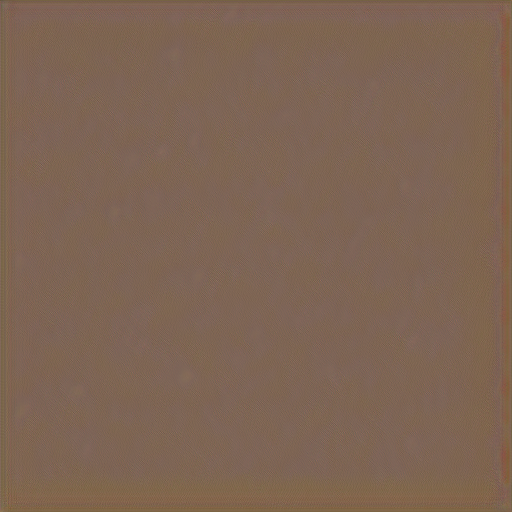

In [ ]:

import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "A cat stretching on the floor, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "../images/test_image.jpg"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

## SAMPLER

sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)